In [1]:
# Implementing Linear Regression on Boston House Prices Dataset

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as mlt
%matplotlib inline

In [3]:
dataset = pd.read_csv('boston_house_prices.csv',header=1)
dataset.shape

(506, 14)

In [4]:
print(type(dataset))
df=pd.DataFrame(dataset)
print(type(df))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [5]:
x=df.drop('MEDV',axis=1)
y=df["MEDV"]

In [6]:
# Implementing train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
x_train


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,393.30,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,396.90,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,386.85,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,395.67,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,388.65,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,109.85,23.27


In [7]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(354, 13)
(354,)
(152, 13)
(152,)


In [8]:
# Standardising the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [9]:
# Implementing Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [10]:
# cross validation - performs multiple train test splits of the same data 
from sklearn.model_selection import cross_val_score
mse=cross_val_score(regression,x_train,y_train,scoring='neg_mean_squared_error',cv=10)
mse

array([-20.96899446, -28.56556055, -48.78676527, -17.90181938,
       -27.86935858, -24.85480776, -18.65321599, -18.02764879,
       -13.94804652, -35.9303906 ])

In [11]:
# finding mean of all the mse found in cross validation
np.mean(mse)

np.float64(-25.550660791660793)

In [12]:
# predicting values
reg_pred=regression.predict(x_test)
reg_pred

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

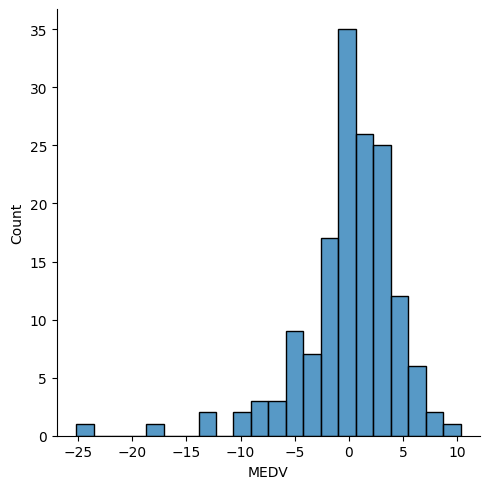

In [13]:
# verifying nby ploting a graph
sns.displot(reg_pred-y_test,kind='hist')

In [14]:
# deviation is less -10 to 10 so all good ig :)

In [15]:
# R^2 score
from sklearn.metrics import r2_score
score=r2_score(reg_pred,y_test)
score

0.6693702691495593